In [1]:
from sklearn.neural_network import MLPClassifier
import numpy as np
import pandas as pd

In [2]:
# read names that have provided survey eye color data
columns = ['name', 'left', 'right', 'left_desc', 'right_desc']
# pgp eye color data from survey
surveyData = pd.read_csv("PGP-eyecolor.csv", names=columns, na_values=['nan', ''])
# names of the pgp participants
surveyNames = np.asarray(surveyData['name'].values.tolist())
leftEyeColors = surveyData['left']
rightEyeColors = surveyData['right']

In [3]:
# load numpy array of names
pgpNames = np.load("names.npy")
# load numpy array of tiled data and delete the extra information
pgp = np.load("hiq-pgp.npy")
for i in range(len(pgpNames)):
    pgpNames[i] = pgpNames[i][:8]

In [4]:
def getData(name, surveyData):
    for index, row in surveyData.iterrows():
        if row['name'] == name:
            return (row['left'], row['right'])

In [6]:
# populate name dictionaries with respective eye color data
namePairIndices = []
nameLeftEyeMap = {}
nameRightEyeMap = {}
for i in range(len(pgpNames)):
    if pgpNames[i] in surveyNames:
        eyeData = getData(pgpNames[i], surveyData)
        namePairIndices.append((i, pgpNames[i]))
        nameLeftEyeMap[pgpNames[i]] = eyeData[0]
        nameRightEyeMap[pgpNames[i]] = eyeData[1]

# create lists containing the known eye color names and the unknown ones.
nameIndices = [nameIndex[0] for nameIndex in namePairIndices]
knownData = pgp[nameIndices]
unknownData = np.delete(pgp, nameIndices, axis=0)

In [7]:
# convert dictionaries to lists using knownData
leftEyeNameList = []
rightEyeNameList = []

knownDataNames = [nameIndices]
for nameTuple in namePairIndices:
    leftEyeNameList.append(nameLeftEyeMap[nameTuple[1]])
    rightEyeNameList.append(nameRightEyeMap[nameTuple[1]])
    
for i in range(len(leftEyeNameList)):
    eyeColor = leftEyeNameList[i]
    if eyeColor > 17:
        leftEyeNameList[i] = 1
    else:
        leftEyeNameList[i] = 0

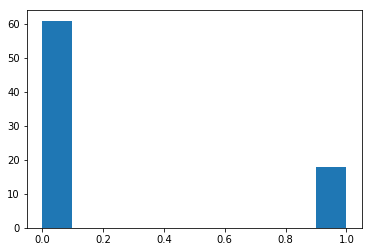

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(leftEyeNameList)
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
clf = MLPClassifier()
clf.fit(knownData, leftEyeNameList)
pred = clf.predict(knownData)

In [10]:
print accuracy_score(leftEyeNameList, pred)

0.772151898734


In [11]:
from sklearn.model_selection import cross_val_score
neural = MLPClassifier()
cvscore = cross_val_score(neural, knownData, leftEyeNameList, cv=10)

In [16]:
print cvscore.mean(j)

0.724206349206


In [14]:
from sklearn.externals import joblib
joblib.dump(clf, 'eye_classifier_mlp.pkl') 

['eye_classifier_mlp.pkl']

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_iter': 200,
 'momentum': 0.9,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}